# Linear regression



In [1]:
%pip install scikit-learn

You should consider upgrading via the '/home/robert/.pyenv/versions/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

In [3]:
# read the dataset
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


This dataset contains 14 variables and their corresponding values for 506 observations. The variables in this dataset are:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: median value of owner-occupied homes in 1000

In [4]:
df.rename(columns={'MEDV':'Price'},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.shape

(506, 14)

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

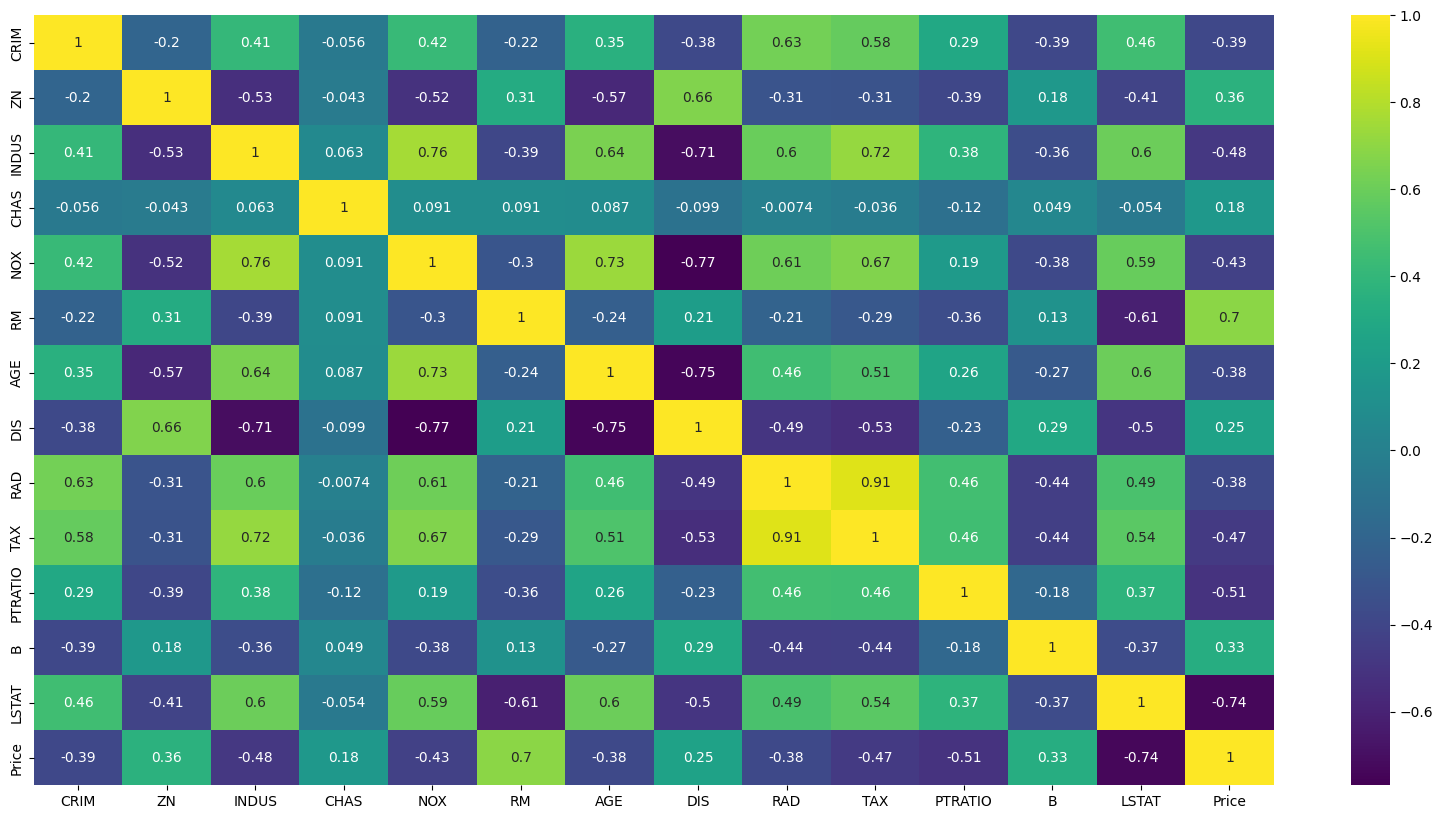

In [8]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True , cmap='viridis')
plt.show()

As we see from the heatmap 0.91 in RAD and TAX we will take one value LSTAT is also showing negative correlation and RM with 0.69 is also considerable

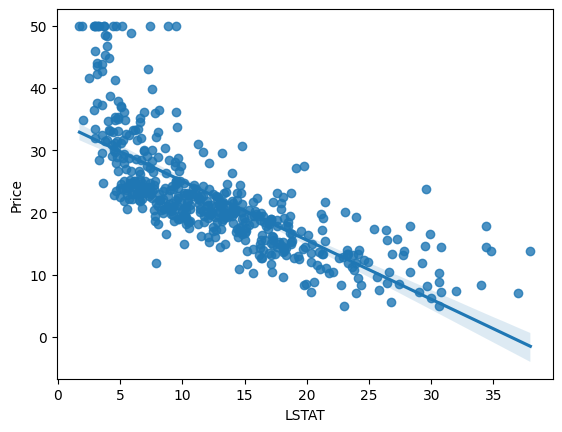

In [9]:
##now after taking the values from heatmap we will draw reg plot to see the reaction
sns.regplot(y=df['Price'],x=df['LSTAT'])
plt.show()
    

This shows the negative coorelation as LSTAT increasesthe price decreases as given in heatmap

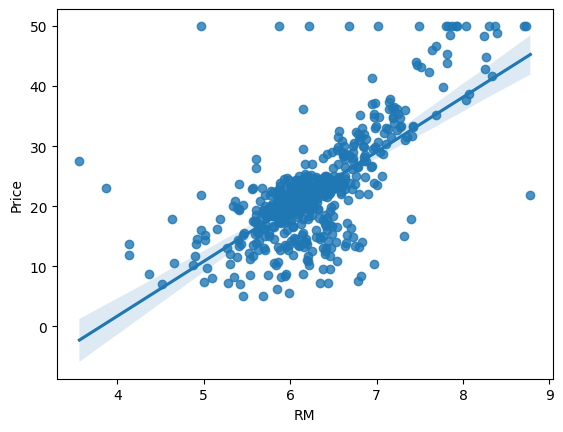

In [10]:
#LSTAT shows it negative co-related to price lets see of rm
sns.regplot(y=df['Price'], x=df['RM'])
plt.show()

In [11]:
X=df.drop(columns=['Price','RAD'],axis=1)
y=df['Price']

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
    ##Transformation
    # transforming the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
     # fitting the model on the training data
    model.fit(X_train, y_train)
    
    # predicting using the trained model
    pred = model.predict(X_test)
    
    
    # cross-validating the model to evaluate its performance
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("MSE:",mean_squared_error(y_test,pred))
    print("Cross validation score:",cv_score)

In [13]:
model=LinearRegression()
train(model,X,y)

MSE: 23.87100506736491
Cross validation score: 35.581366210769275


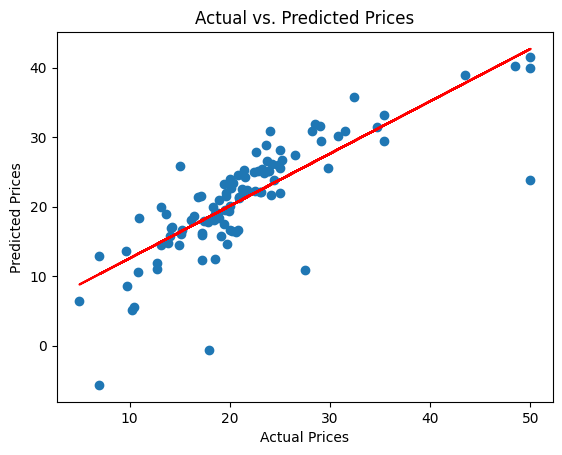

In [14]:
from scipy import stats
def train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
    ##Transformation
    # transforming the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
     # fitting the model on the training data
    model.fit(X_train, y_train)
    
    # predicting using the trained model
    pred = model.predict(X_test)
    
    return model, y_test
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)
# Calculate the slope and intercept of the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot(y_test, slope*y_test + intercept, color='red')
plt.show()